In [ ]:
import os

dataset_path = r"C:\Users\Vergin\cracks"  # Change this to your actual path
#print("Files in dataset:", os.listdir(dataset_path))  # List all files
d_n = r"C:\Users\Vergin\cracks\Positive"
d_p = r"C:\Users\Vergin\cracks\Negative"

In [ ]:

#import os

#dataset_path = r"C:\Users\Dell\Downloads\cracks"  # Change this to your actual path
#print("Files in dataset:", os.listdir(dataset_path))  # List all files
#d_n = r"C:\Users\Dell\Downloads\cracks\Positive"
#d_p = r"C:\Users\Dell\Downloads\cracks\Negative"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
for root, dirs, files in os.walk(d_n):
    print(f"Folder: {root}, Number of Files: {len(files)}")
    break  # Print only the first folder's content
for root, dirs, files in os.walk(d_p):
    print(f"Folder: {root}, Number of Files: {len(files)}")
    break  # Print only the first folder's content

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model,layers
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        if len(images)>3:
            break
    fig=plt.figure(figsize=(10,12))
    xrange=range(1,5)

    for img,x in zip(images,xrange):
        ax=fig.add_subplot(2,2,x)
        ax.imshow(img)
        ax.set_title(img.shape)

In [ ]:
load_images_from_folder(r"C:\Users\Vergin\cracks\Positive")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Vergin\\cracks\\Positive'

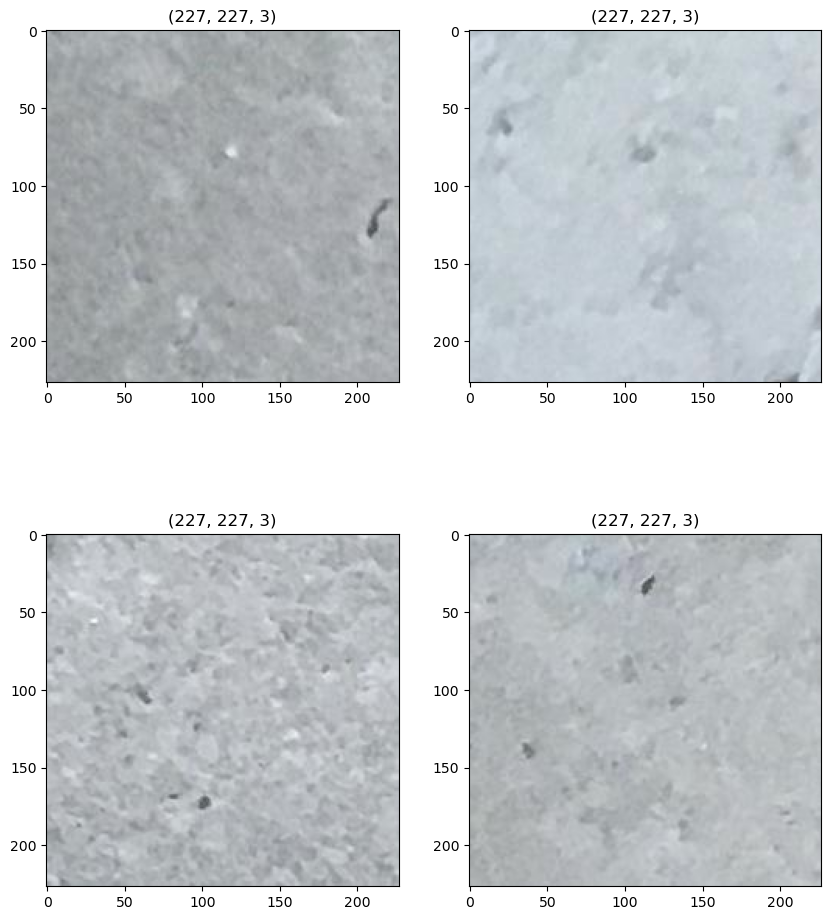

In [ ]:
load_images_from_folder(r"C:\Users\Dell\Downloads\cracks\Negative")

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nReached 98.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
import h5py

local_weights_file = r"D:\inceptionv3\inception_v3_weights_tf_dim_ordering_tf_kernels.h5\inception_v3_weights_tf_dim_ordering_tf_kernels.h5"

try:
    with h5py.File(local_weights_file, 'r') as f:
        print("File opened successfully!")
except Exception as e:
    print("Error opening file:", e)

File opened successfully!


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = "./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"  # Ensure the correct file extension
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)
pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense  (1, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)
train_generator = train_datagen.flow_from_directory(r"C:\Users\Dell\Downloads\cracks",
                                                     target_size=(150,150),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     class_mode='binary',
                                                     subset='training')

Found 17139 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)
validation_generator =  validation_datagen.flow_from_directory(r"C:\Users\Dell\Downloads\cracks",
                                                                target_size=(150,150),
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                subset='validation')

Found 7345 images belonging to 2 classes.


In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
            validation_data=validation_generator,
            epochs=7,
            verbose=1,
            callbacks=[callbacks])

Epoch 1/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 821s 3s/step - accuracy: 0.9671 - loss: 0.1711 - val_accuracy: 0.9974 - val_loss: 0.0095
Epoch 2/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 533s 2s/step - accuracy: 0.9970 - loss: 0.0103 - val_accuracy: 0.9963 - val_loss: 0.0111
Epoch 3/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.9937 - val_loss: 0.0223
Epoch 4/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.9980 - val_loss: 0.0095
Epoch 5/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 462s 2s/step - accuracy: 0.9983 - loss: 0.0048 - val_accuracy: 0.9974 - val_loss: 0.0089
Epoch 6/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9978 - val_loss: 0.0083
Epoch 7/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9994 - loss: 0.0018
Reached 98.0% accuracy so cancelling training!
268/268 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9975 - 

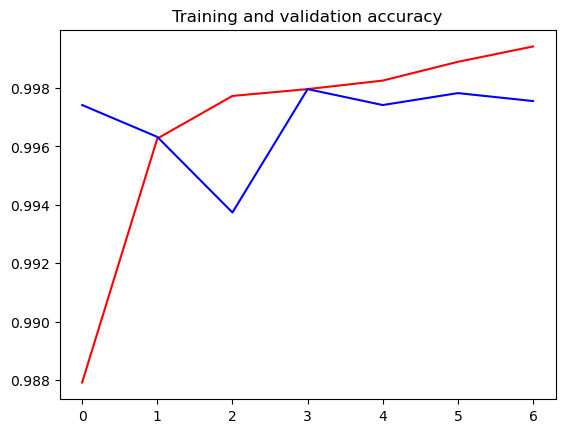

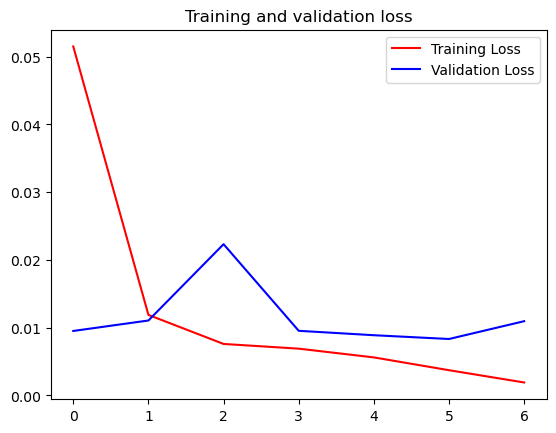

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model, layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tkinter import Tk, filedialog

In [ ]:
local_weights_file = "./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model_vgg = Model(pre_trained_model.input, x)
model_vgg.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(r"C:\Users\Dell\Downloads\cracks",
                                                     target_size=(150,150),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     class_mode='binary',
                                                     subset='training')

Found 17139 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

validation_generator =  validation_datagen.flow_from_directory(r"C:\Users\Dell\Downloads\cracks",
                                                                target_size=(150,150),
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                subset='validation')

Found 7345 images belonging to 2 classes.


In [ ]:
callbacks = myCallback()

history = model_vgg.fit(train_generator,
                                  validation_data = validation_generator,
                                  epochs = 7,
                                  verbose = 1,
                                  callbacks=[callbacks])

Epoch 1/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 509s 2s/step - accuracy: 0.9777 - loss: 0.1166 - val_accuracy: 0.9940 - val_loss: 0.0183
Epoch 2/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.9955 - loss: 0.0130 - val_accuracy: 0.9975 - val_loss: 0.0088
Epoch 3/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.9970 - loss: 0.0085 - val_accuracy: 0.9977 - val_loss: 0.0074
Epoch 4/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.9975 - loss: 0.0071 - val_accuracy: 0.9966 - val_loss: 0.0129
Epoch 5/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9982 - val_loss: 0.0082
Epoch 6/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9989 - loss: 0.0025
Reached 98.0% accuracy so cancelling training!
268/268 ━━━━━━━━━━━━━━━━━━━━ 411s 2s/step - accuracy: 0.9989 - loss: 0.0025 - val_accuracy: 0.9974 - val_loss: 0.0131


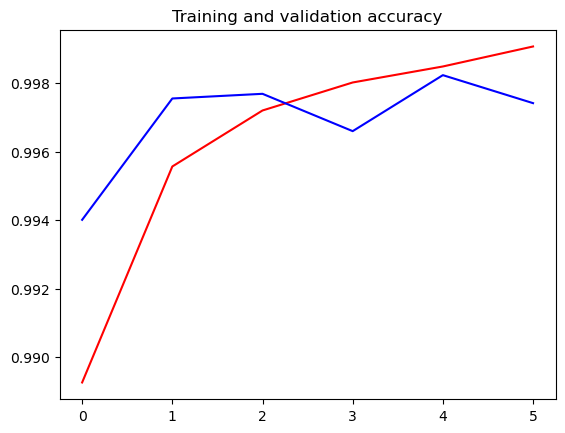

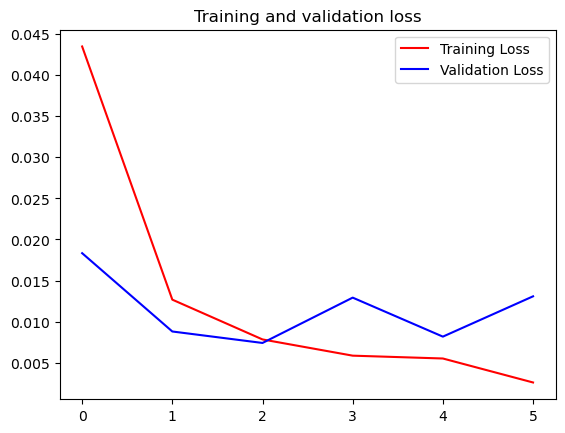

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs =AC range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.3,
                                   preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(r"C:\Users\Dell\Downloads\cracks",
                                                     target_size=(224,224),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

Found 17139 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(validation_split=0.3,
                                        preprocessing_function=preprocess_input)
validation_generator =  validation_datagen.flow_from_directory(r"C:\Users\Dell\Downloads\cracks",
                                                                target_size=(224,224),
                                                                batch_size=64,
                                                                class_mode='categorical',
                                                                subset='validation')

Found 7345 images belonging to 2 classes.


In [ ]:
model_res50 = Sequential()
model_res50.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet'
    ))
model_res50.add(Dense(2, activation='softmax'))
model_res50.layers[0].trainable = False
model_res50.summary()
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
callbacks = myCallback()
model_res50.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
fit_history = model_res50.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    validation_steps=steps_per_epoch_validation,
    epochs=7,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callbacks]
)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 1648s 6s/step - accuracy: 0.9276 - loss: 0.1685 - val_accuracy: 0.9984 - val_loss: 0.0088
Epoch 2/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 1621s 6s/step - accuracy: 0.9983 - loss: 0.0082 - val_accuracy: 0.9990 - val_loss: 0.0048
Epoch 3/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 1782s 7s/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 4/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 4140s 15s/step - accuracy: 0.9990 - loss: 0.0047 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 5/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9991 - loss: 0.0039
Reached 98.0% accuracy so cancelling training!
268/268 ━━━━━━━━━━━━━━━━━━━━ 1511s 6s/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9996 - val_loss: 0.0023


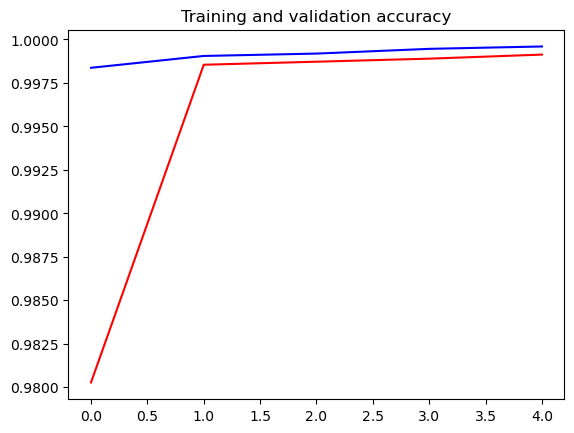

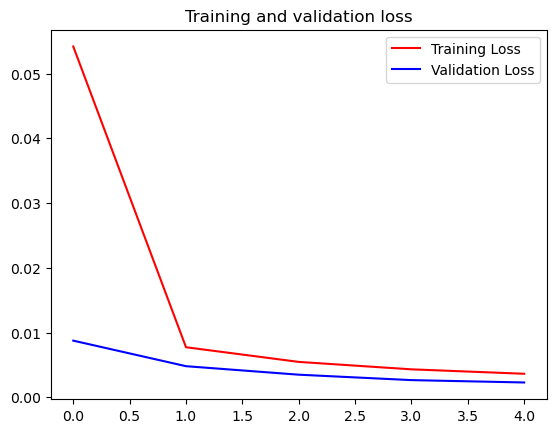

In [ ]:
acc = fit_history.history['accuracy']
val_acc = fit_history.history['val_accuracy']
loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_path = input("Enter the path to the image: ").strip().strip('"').strip("'")

Enter the path to the image: "C:\Users\Dell\Desktop\exam\6\crack3.jpg"


In [ ]:
img = image.load_img(img_path, target_size=(224, 224))

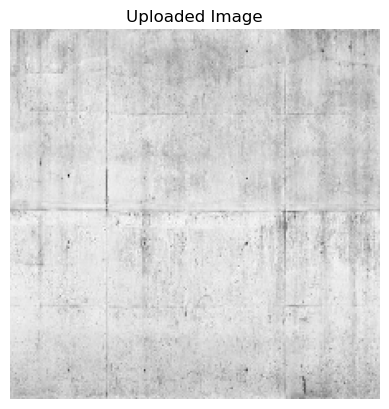

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.title('Uploaded Image')
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
prediction = model_res50.predict(img_array)
predicted_class = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


In [ ]:
if predicted_class == 0:
    print("Prediction: No Crack Detected ✅")
else:
    print("Prediction: Crack Detected ⚠️")

Prediction: No Crack Detected ✅
